In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

In [2]:
Name = "Yujing Zhang"
UNI = "yz4471"
Collaborators = "Consult with TAs"

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Homework 1:  Introduction

## Question 1

Write out the solution (by-hand) to the following sets of equations.  **FULLY** justify your solution (do not just write the answer).

If you want to review some of these concepts check out Strang's [Linear Algebra](https://clio.columbia.edu/catalog/10612929) text or for only the fundamentals check out Strang's [The Fundamental Theorem of Linear Algebra](http://www.jstor.org/stable/2324660?seq=1#page_scan_tab_contents)

**(a)** (5) Solve $A x = b$ where
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3
    \end{bmatrix} ~~~~ 
    b = \begin{bmatrix}
        1 \\
        -2
    \end{bmatrix}
$$

Since$$Ax=b$$
$$x=A^{-1}b$$

Use elementary transformation method, derive $A^{-1}$:
$$
  (A, E) =
  \left[ {\begin{array}{cc}
    2 & 1 & 1 & 0\\
    1 & 3 & 0 & 1\\
  \end{array} } \right]
$$

$$
=
  \left[ {\begin{array}{cc}
    1 & 3 & 0 & 1\\
    0 & -5 & 1 & -2\\
  \end{array} } \right]
$$

$$
=
  \left[ {\begin{array}{cc}
    1 & 0 & \frac{3}{5} & \frac{-1}{5} \\
    0 & 1 & \frac{-1}{5} & \frac{2}{5} \\
  \end{array} } \right]
$$

So,
$$A^{-1}=
\left[ {\begin{array}{cc}
    \frac{3}{5} & \frac{-1}{5} \\
    \frac{-1}{5} & \frac{2}{5} \\
  \end{array} } \right]
$$

Then, calculate $$x=A^{-1}b$$

$$
\left[ {\begin{array}{cc}
    \frac{3}{5} & \frac{-1}{5} \\
    \frac{-1}{5} & \frac{2}{5} \\
  \end{array} } \right]
\times
\left[ {\begin{array}{cc}
    1 \\
    -2 \\
  \end{array} } \right]
=
\left[ {\begin{array}{cc}
    1 \\
    -1 \\
  \end{array} } \right]
$$

So, the result is 
$$
\left[ {\begin{array}{cc}
    1 \\
    -1 \\
  \end{array} } \right]
$$


**(b)** (5) Solve the system of equations:
\begin{align}
    2x + 3y &= 1 \\
    6x + 9y &= 3
\end{align}

The augmented matrix:
$$
  \left[ {\begin{array}{cc}
    2 & 3 & 1\\
    6 & 9 & 3\\
  \end{array} } \right]
$$

Perform elementary transformation, $R2-3R1$:
$$
  \left[ {\begin{array}{cc}
    2 & 3 & 1\\
    0 & 0 & 0\\
  \end{array} } \right]
=
  \left[ {\begin{array}{cc}
    1 & \frac{3}{2} & \frac{1}{2}\\
    0 & 0 & 0\\
  \end{array} } \right]
$$

So, the result is $$x=\frac{1}{2}-\frac{3}{2}y$$

**(c)** (5) Why will I not be able to solve $Ax=b$ for
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3 \\
        0 & 4
    \end{bmatrix} ~~~~ 
    b = \begin{bmatrix}
        2 \\
        0 \\
        1
    \end{bmatrix}?
$$
Describe why this is a problem in terms of the column, row, left-null, and null spaces of $A$ and how that relates to the vector $b$.

1. Mathematical explanation:
    according to equation #3, $4\times X_2=1, X_2=1/4$, so according to equation #1, $X_1=\frac{7}{8}$
    plug them into equation #2, result is not equal to 0
2. Linear algebra explanation:
    $b$ does not belong to the linear combination of 
$
  \left[ {\begin{array}{cc}
    2\\
    1\\
    0\\
  \end{array} } \right]
$
and
$
  \left[ {\begin{array}{cc}
    1\\
    3\\
    4\\
  \end{array} } \right]
$
.
    In other words, the matrix $b$ is not in the vector space of the column or row vectors of generated by $A$. 
The only the trivial solution is $x_1=x_2=0$


## Question 2

**(a)** (10) Write a function that computes
$$
    \sum^\infty_{n=1} \frac{a^n}{b^{n-1}}
$$
until the difference between subsequent partial sums is less than the given tolerance $T$.  Return the computed sum.  Make sure to include a way for the function to exit if the partial sums do not satisfy the above criteria (the sum may not be convergent for instance).

In [3]:
def compute_sum(a, b, tolerance=1e-5):
    """Compute the sum $\sum^\infty_{n=1} a^n / b^{n-1} until the partial sums are less than *tolerance*.
    
    Returns the computed sum and raises a *ValueError* if the sum appears to be diverging.
    """
    n=1
    sum2 = 0
    sum1 = 0
    diff = 1e5
    
    if abs(a) > abs(b):                           #special situation?
        raise ValueError("Series Diverges")
        
    while abs(diff) >= tolerance: 
        sum1 = sum2                             #iteration
        sum2 += (a**n) / (b**(n-1))
        diff = sum2 - sum1
        n=n+1

    return sum2
    raise NotImplementedError()
    return computed_sum

In [4]:
numpy.testing.assert_allclose(compute_sum(-2.0, 3.0, 1e-16), -1.2)
numpy.testing.assert_allclose(compute_sum(1.0, 2.0, 1e-16), 2.0)
try:
    compute_sum(2.0, 1.0, 1e-16)
except ValueError:
    pass
else:
    assert False

**(b)** (5) Explore different tolerances for your function above for $a=-2$ and $b=3$.  Plot the value of the tolerance
$$
    \left| ~ \sum^\infty_{n=1} \frac{a^n}{b^{n-1}} - (-1.2) ~\right |
$$
versus the difference.  The plotting command `loglog` may be useful to effectively visualize the problem.  What do you observe?

Hint:  Try using tolerances in the range $T \in [10^{-30}, 10^{-2}]$.  Use the functions `logspace` to generate well spaced points and `loglog` to plot the data.

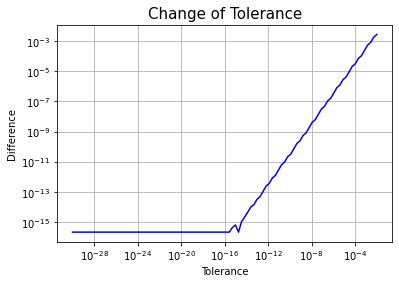

In [5]:
# YOUR CODE HERE
import numpy
from matplotlib import pyplot as plt

y = []
x = numpy.logspace(-30, -2, 100)
for i in x:
    tolerance_new = numpy.abs(compute_sum(-2,3,tolerance=i) - (-1.2))
    y.append(tolerance_new)

plt.title("Change of Tolerance", fontsize=15)
plt.xlabel("Tolerance")
plt.ylabel("Difference")
plt.loglog(x, y,'blue')
plt.grid()
plt.show()

The tolerance remains the same between $(10^{-28}, 10^{-16})$. At approximately $10^{-15}$, the tolerance fluctuate and then increases as tolerance increases

## Question 3

**(a)** (7) Compute the first 3 terms of the Taylor series of the function
$$
    f(x) = e^{-x^2} \sin( x - \pi)
$$
centered at $x_0 = \pi$.

First three tems of Taylor Series
$$x(x) = f(x_0)+f'(x_0)(x-x_0)+\frac{f''(a)}{2!}(x-a)^2$$
Since $$x_0=\pi$$

Then,
$$f'(x) = -e^{-x^2} (cos(x)-2xsin(x))$$

$$f''(x) = -e^{-x^2} [(3-4x)sin(x)+4xcos(x)]$$

And,
$$f(\pi)=0$$
$$f'(\pi)=e^{-\pi^2}$$
$$f''(x)=-4\pi e^{-\pi^2}$$

So,
$$f(x)=e^{{-\pi}^2}(x-\pi)-2e^{{-\pi}^{2}}{(x-\pi)}^2\pi$$

**(b)** (8) Solve the ODE
$$
    u'' + u' + \frac{5}{4} u = 0
$$
with initial conditions $u(0) = 3$ and $u'(0) = 1$.  Plot the solution and comment on its behavior as $t \rightarrow \infty$.

YOUR ANSWER HERE

Extract characteristic equation:
$$r^2+r+\frac{5}{4}=0$$
Derive roots of characteristic equation:
$$r=-\frac{1}{2} \pm i$$
When$p^2-4q<0$, the general solution of the original equation is:
$$u = e^{ax}(c_1cos(\beta x)+c_2sin(\beta x))$$
$\alpha = -\frac{1}{2}, \beta=1$. So, $$u = e^{-\frac{1}{2}x}(c_1cosx+c_2sinx)$$

With boundary value $u(0)=3$:
$$c_1 = 3$$
$$u = e^{-\frac{1}{2}x}(3cosx+c_2sinx)$$

Then, derive $u'(x)$:
$$u'(x) = -\frac{1}{2} e^{-\frac{1}{2}x} (3cosx+c_2sinx) + e^{-\frac{1}{2}x} (-3sinx+c_2 cosx)$$
With $u'(0)=1$:
$$c_2 = \frac{5}{2}$$
$$u = e^{-\frac{1}{2}x}(3cosx+ \frac{5}{2} sinx)$$

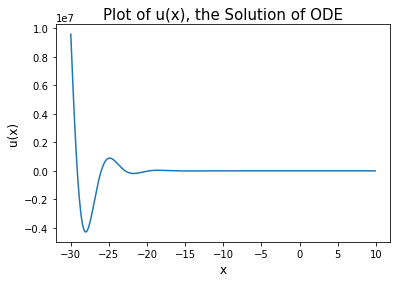

In [6]:
#plot
x = numpy.arange(-30, 10, 0.1)
y = numpy.exp(-1/2*x)*(3*numpy.cos(x)+5/2 * numpy.sin(x))
plt.title("Plot of u(x), the Solution of ODE", fontsize=15)
plt.xlabel("x",fontsize=12)
plt.ylabel("u(x)",fontsize=12)

plt.plot(x, y)
plt.show()

#Comment
#It will approach 0

## Question 4

(5) Plot something "fun" making sure to label the axes and colorbar if appropriate.  Use the [matplotlib gallery](http://matplotlib.org/gallery.html) for inspiration.

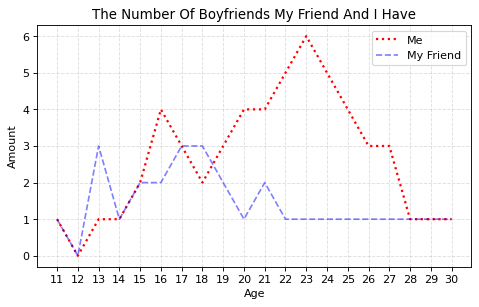

In [7]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(7,4), dpi=80)
x = range(11,31,1)
y=[1,0,1,1,2,4,3,2,3,4,4,5,6,5,4,3,3,1,1,1]
z=[1,0,3,1,2,2,3,3,2,1,2,1,1,1,1,1,1,1,1,1]

plt.xticks(x)
plt.xlabel("Age")
plt.ylabel("Amount")
plt.title("The Number Of Boyfriends My Friend And I Have")

plt.grid(alpha=0.4,linestyle="--")
plt.yticks(range(0,9))


plt.plot(x,y,label="Me",color="red",linestyle=':',linewidth=2)
plt.plot(x,z,label="My Friend",color="blue",\
         linestyle="--",alpha=0.5) 
plt.legend(loc=0) 
plt.show()

#comments: not true, just for fun hahaha

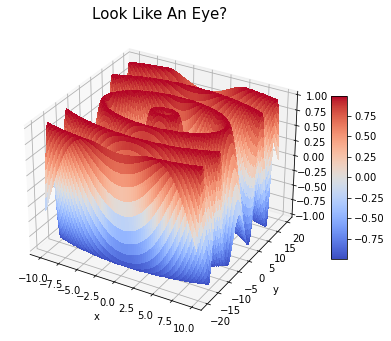

In [8]:
#Then try a 3D guy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import numpy as np

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = np.arange(-10, 10, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title("Look Like An Eye?", fontsize=15)
plt.xlabel("x")
plt.ylabel("y")

plt.show()

## Question 5 - The Trouble with Tribbles

Plot the following data using the appropriate plot types making sure to adding lables, units, and titles.  Also refer to the [matplotlib gallery](http://matplotlib.org/gallery.html) to figure out how to plot some of what is asked.

**(a)** [5] The number of tribbles (furry animals from Star Trek) is modeled by Spock to be exponential.  Spock predicts that in a 3 day period that the tribbles will go from an initial population number of $N_0 = 1$ to $N(3) = 1,771,561$ tribbles.  The assumptions that Spock made are the following:
 - The tribbles reproduce every 12 hours.
 - Tribbles reproduce asexually so that 1 tribble will produce 10 more tribbles leading to a total of 11 tribbles.
Write a function that confirms Spock's estimate and plot the function.

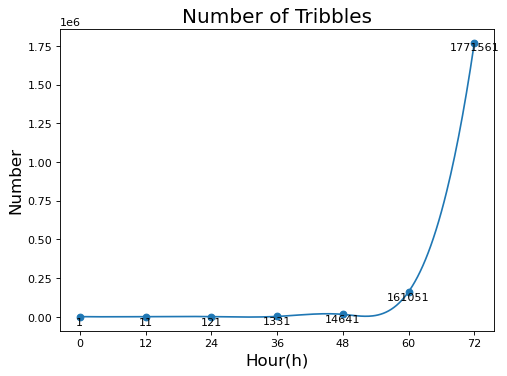

[1, 11, 121, 1331, 14641, 161051, 1771561]

In [9]:
# YOUR CODE HERE
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def tribble(r=10, N=1, T=7):
    #To calculate the number of tribbles which reproduce every 12 hours

    G=0          #Population Growth
    t=1          #Every 12 Hours
    size=1       #Total Population Size
    size_list=[1,]

    while t<T:
        G=r*N
        N*=11
        t+=1
        size+=G
        size_list.append(size)
    
    #Begin to plt
    x = np.array([0, 12, 24, 36, 48, 60, 72])
    y = np.array(size_list)
    x_smooth = np.linspace(x.min(),x.max(),300)              #smooth
    y_smooth = make_interp_spline(x, y)(x_smooth)
    
    fig = plt.figure(figsize=(7,5), dpi=80)                  #beautification
    plt.title("Number of Tribbles",fontsize=18)
    plt.xticks(x)
    plt.xlabel("Hour(h)",fontsize=15)
    plt.ylabel("Number",fontsize=15)
    for a,b in zip(x,y):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'top',fontsize=10)
    
    plt.plot(x_smooth, y_smooth)
    plt.scatter(x, y)
    plt.show()
    return(size_list)
    
tribble()

In [10]:
#Another Method rather than smoothing
def population(n0, r, t):
    return n0*numpy.power(1+r,t/12)

**(b)** [5] Assuming that tribbles cannot stack themselves on top of each other perfectly we also would like to model and plot the spread of tribbles throughout our space ship.  Assume our space ship is a square use the following function to plot the population on our space ship of tribbles:
$$
    N(x, y) = N_0 e^{-r^2/\sigma^2}
$$
where $N_0 = 1000$, $\sigma = 0.1$ and $r$ is the distance from the middle of our space ship.

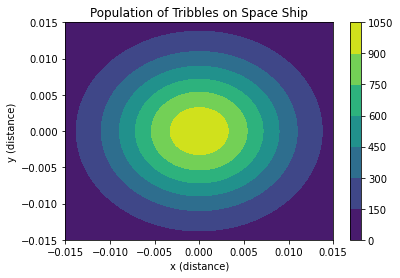

In [11]:
x = numpy.linspace(-0.015, 0.015, 100)
y = numpy.linspace(-0.015, 0.015, 100)
X, Y = numpy.meshgrid(x, y)
r = numpy.sqrt(X**2 + Y**2)
Z = 1000*numpy.exp(-10000*r**2)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(x ,y, Z)
fig.colorbar(cp) 
ax.set_title('Population of Tribbles on Space Ship')
ax.set_xlabel('x (distance)')
ax.set_ylabel('y (distance)')
plt.show()